**Linear Regression Model**

📊 Logistic Regression Evaluation
Accuracy: 0.7000
F1 Score: 0.6786
AUC Score: 0.7544
Confusion Matrix:
[[23  7]
 [11 19]]


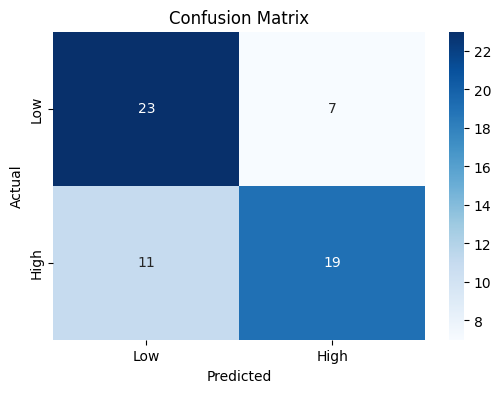

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("Project-Management-2.csv")

# Data preparation
df['Start Date'] = pd.to_datetime(df['Start Date'], dayfirst=True, errors='coerce')
df['End Date'] = pd.to_datetime(df['End Date'], dayfirst=True, errors='coerce')
df['Duration Days'] = (df['End Date'] - df['Start Date']).dt.days
df['Delay'] = df['Project Status'].apply(lambda x: 1 if x == 'Behind' else 0)
df['Budget Deviation'] = df['Budget'] - df['Actual Cost']
df['Resource Usage Ratio'] = df.apply(lambda row: row['Hours Spent'] / row['Duration Days'] if row['Duration Days'] > 0 else None, axis=1)

# Drop rows with missing values
df = df.dropna()

# Feature matrix
X = df[['Budget', 'Actual Cost', 'Progress', 'Delay', 'Budget Deviation']]

# Convert target to binary classification (High or Low Resource Usage)
threshold = df['Resource Usage Ratio'].median()  # You can change this threshold
df['Resource Usage Classification'] = (df['Resource Usage Ratio'] >= threshold).astype(int)

# Target for classification
y = df['Resource Usage Classification']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Logistic Regression (as a classifier)
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
y_proba = lr_model.predict_proba(X_test)[:, 1]  # probability for positive class
auc = roc_auc_score(y_test, y_proba)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Displaying the results
print("📊 Logistic Regression Evaluation")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC Score: {auc:.4f}")
print("Confusion Matrix:")
print(cm)

# Plotting the Confusion Matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
